![download](city-1265055_1280.jpg)
In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![download](Taxi_snap.png)
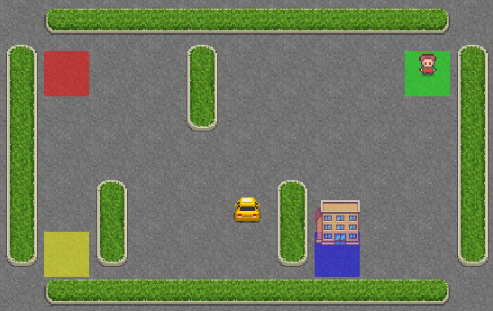
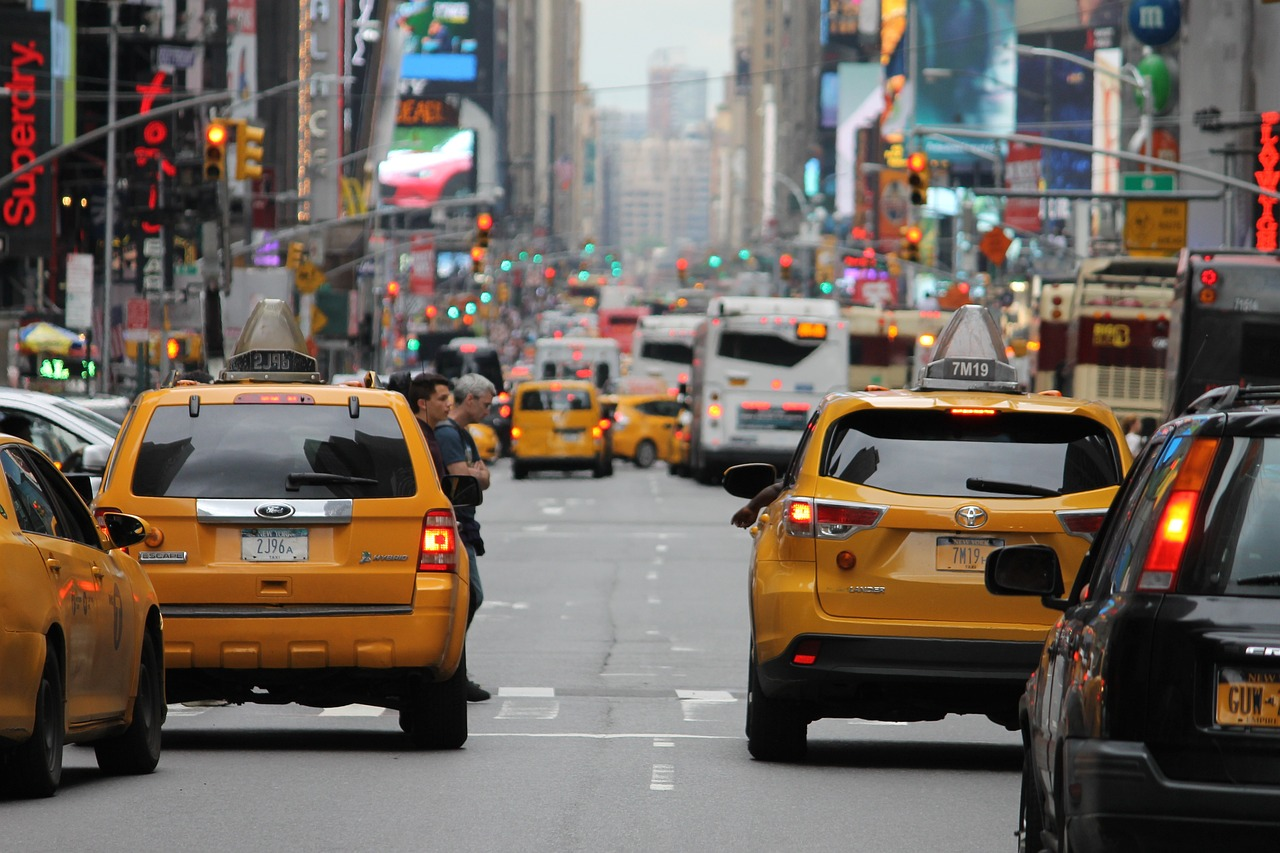

In [84]:
# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding
import matplotlib.pyplot as plt
import pygame
import random


# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

Defaulting to user installation because normal site-packages is not writeable


In [85]:
state, info = env.reset() # Reset our Env variables
state_image = env.render() # Get env Image
 
# plt.imshow(state_image)
# plt.axis("off")
# plt.show()

In [86]:
print("Number of Actions: ",env.action_space.n) # 6 possible actions
print("Number of States: ", env.observation_space.n) # 500 Observation

Number of Actions:  6
Number of States:  500


* Move
    * 0 -> South
    * 1 -> North
    * 2 -> East
    * 3 -> West
    
* Passeger
    * 4 -> Pick Up
    * 5 -> Drop

In [87]:
action = env.action_space.sample() # Get Random Action
env.unwrapped.P[state][action] # (probab, next_state, reward, is_terminal)

[(1.0, 486, -1, False)]

### Taking Random Actions

In [88]:
state, info = env.reset()
terminated = False
frames = []
while not terminated:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())

In [89]:
# frames_step_size = len(frames) // 500 # Length // desired frame count -> [::frames_step_size]
# imageio.mimsave('taxi_agent_behavior.gif', frames[-500:], fps=5) # Frame per second, doesnt reduce GIF size.

# Display GIF
# gif_path = "taxi_agent_behavior.gif" 
# Image(gif_path) 

In [90]:
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        action = env.action_space.sample() # Exploration
    else:
        action = np.argmax(q_table[state]) # Exploitation
    return action

In [91]:
def update_q_table(state, action, new_state):
    next_max = np.max(q_table[new_state])
    current = q_table[state][action]
    return (1 - alpha) * current + alpha * (env.unwrapped.P[state][action][0][2] + gamma * next_max)

In [92]:
env = gym.make("Taxi-v3", render_mode='rgb_array')
epsilon = 0.9  # Exploration rate
epsilon_decay = 0.999
min_epsilon = 0.01
total_episodes = 2000
alpha = 0.5
gamma = 0.99
max_actions = 100

num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))
episode_returns = []

for episode in range(total_episodes):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    actions_per_eps = 0
    while (not terminated) & (actions_per_eps < max_actions):
        action = epsilon_greedy(state)
        new_state, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        q_table[state][action] = update_q_table(state, action, new_state)
        state = new_state
        actions_per_eps += 1

        # for event in pygame.event.get():
        #     if event.type == pygame.QUIT:
        #         terminated = True
        #         env.close() # Or - pygame.quit()
    
    episode_returns.append(episode_reward)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    

In [93]:
def policy():
    return {state: np.argmax(values) for state, values in enumerate(q_table)}
policy = policy()

In [94]:
env = gym.make("Taxi-v3", render_mode='rgb_array')
state, info = env.reset()
terminated = False
frames = []
episode_total_reward = 0 # Should be at least 4

while not terminated:
    action = policy[state]
    state, reward, terminated, truncated, info = env.step(action)
    episode_total_reward += reward
    frames.append(env.render())

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            terminated = True
            env.close() # Or - pygame.quit()
env.close()

In [95]:
episode_total_reward

9

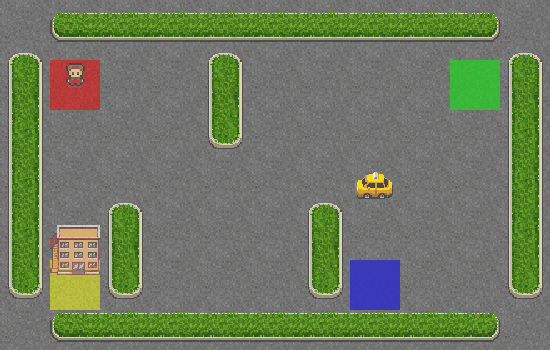

In [96]:
# frames_step_size = len(frames) // 500 # Length // desired frame count -> [::frames_step_size]
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5) # Frame per second, doesnt reduce GIF size.

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 